# Convolution Assignment : Group 2
## Author : Dev and Sakshi Bansal

 ### "Deep learning for computer vision" - Classifying Images

Importing all the needed modules : 

In [1]:
import matplotlib.pyplot as plt
import os
import shutil as sl
import pathlib as pl

**We will be using "Dogs-vs-Cats" dataset for this project**

Our dataset has 25000 images. However, in this project we will only use 2000 samples to tackle and study the problem of overfitting. We will be taking 1000 samples in training, 500 samples in validation and 500 samples in test dataset. 

In [2]:
# Defining directory of folder to store subsets of our originial data
small_directory = pl.Path("/Users/devmarwah/Desktop/dogs-vs-cats/small")
directory_path = pl.Path("/Users/devmarwah/Desktop/dogs-vs-cats/train")

# Defining a function to make subsets
def make_subset(subset_name,start_index,end_index):
    for category in ("cat","dog"):
        dir = small_directory/ subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
                 for i in range(start_index,end_index)]
        for fname in fnames: 
            sl.copyfile(src = directory_path/fname , 
                       dst = dir/fname)
        

make_subset("Training",start_index=0,end_index=1000)
make_subset("Validation",start_index = 1000, end_index = 1500)
make_subset("Test",start_index = 1500,end_index = 2000)

Reading training, validation and testing datsets 

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory as id

Train = id("/Users/devmarwah/Desktop/dogs-vs-cats/Small/Training",image_size=(180,180),batch_size=32)
Validation = id("/Users/devmarwah/Desktop/dogs-vs-cats/Small/Validation",image_size=(180,180),batch_size=32)
Test = id("/Users/devmarwah/Desktop/dogs-vs-cats/Small/Test",image_size=(180,180),batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Printing shapes of our datsets to make sure we got everything right.

In [14]:
for i,j in Train : 
    print('Shape of Image : ', i.shape)
    print('Size of Batches :', j.shape)
    break 

Shape of Image :  (32, 180, 180, 3)
Size of Batches : (32,)


Hence, our batch size in 32 and images are of shape (180,180,3) where 3 refers to RGB colored image.

### Constructing Model

In [15]:
# Importing keras and layers 
from tensorflow import keras
from tensorflow.keras import layers

Constructing the model :

In [19]:
inputs = keras.Input(shape = (180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

Having a look at the model 

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the constructed model 

In [23]:
model.compile(loss = "binary_crossentropy",
             optimizer= "Adam",
             metrics = ["accuracy"])

Fitting the model on training and validation set

In [24]:
training = model.fit(Train,
                    epochs = 30,
                    validation_data = Validation)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 450ms/step - accuracy: 0.5162 - loss: 0.7009 - val_accuracy: 0.5120 - val_loss: 0.6902
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.5155 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 504ms/step - accuracy: 0.5051 - loss: 0.6930 - val_accuracy: 0.5160 - val_loss: 0.6922
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 506ms/step - accuracy: 0.5348 - loss: 0.6895 - val_accuracy: 0.5340 - val_loss: 0.6828
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 516ms/step - accuracy: 0.5312 - loss: 0.6875 - val_accuracy: 0.5860 - val_loss: 0.6689
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 520ms/step - accuracy: 0.5357 - loss: 0.6900 - val_accuracy: 0.5400 - val_loss: 0.6779
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 522ms/step - accuracy: 0.5752 - loss: 0.6789 - val_accuracy: 0.5740 - val_loss: 0.6836
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.5877 - loss: 0.6791 - val_accu

Now, we will be plotting loss and accuracy of training and validation set to check for overfitting.b

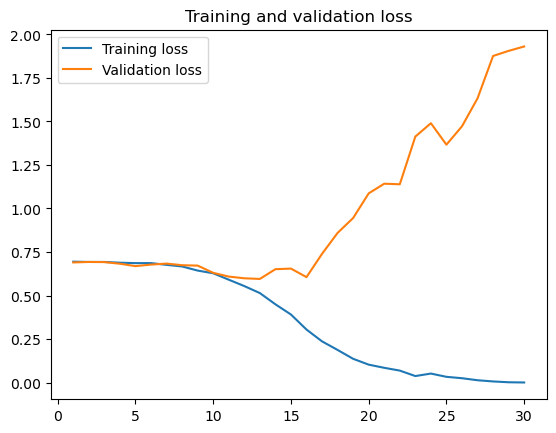

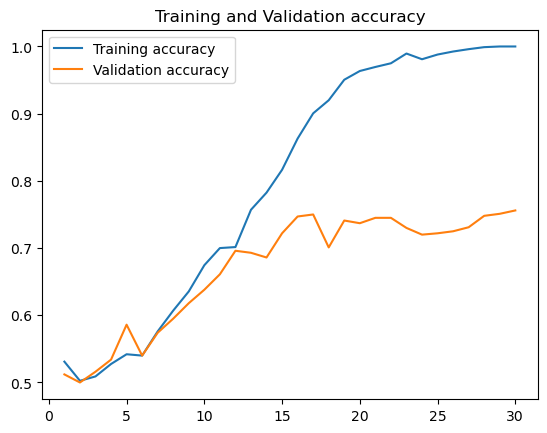

In [26]:
# Storing accuracies and losses in variables
accuracy = training.history["accuracy"]
val_accuracy = training.history["val_accuracy"]
loss = training.history["loss"]
val_loss = training.history["val_loss"]
epochs = range(1,len(accuracy)+1)
# Plotting losses
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
# Plotting accuracies
plt.plot(epochs,accuracy,label="Training accuracy")
plt.plot(epochs, val_accuracy,label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()

These graphs are characteristics of **overfitting**. We would have apply some techniques to overcome overfitting. 
Let's check accuracy on testing data. It is expected to be low because of overfitting.

In [30]:
model.evaluate(Test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7194 - loss: 2.0856


[2.0504746437072754, 0.7319999933242798]

Hence, accuracy turned out to be 71.9 % which is a very low accuracy.

### Using data augmentation and dropout to reduce overfitting

In [34]:
# Using keras sequential for data augmentation
data_augmentation = keras.Sequential(
[
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

Constructing model again with Data Augmentation and Dropout : 

In [36]:
inputs = keras.Input(shape = (180,180,3))
x=data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
x= layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

# Compiling model
model.compile(loss = "binary_crossentropy",
             optimizer= "Adam",
             metrics = ["accuracy"])

In [ ]:
# Fitting this new model : 
training = model.fit(Train,
                    epochs = 100,
                    validation_data = Validation)

Now, plotting accuracies and losses :  

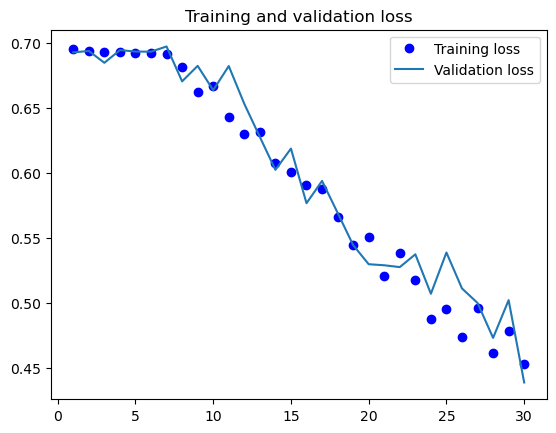

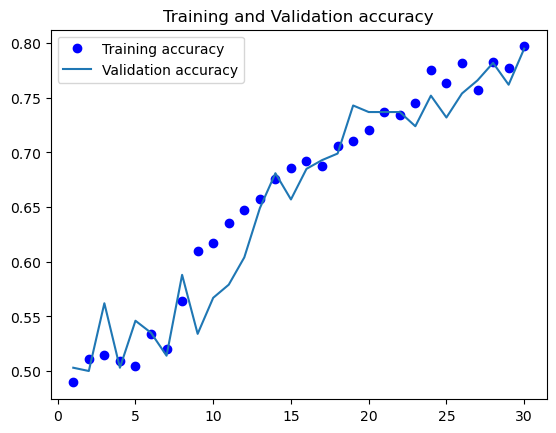

In [40]:
# Storing accuracies and losses in variables
accuracy = training.history["accuracy"]
val_accuracy = training.history["val_accuracy"]
loss = training.history["loss"]
val_loss = training.history["val_loss"]
epochs = range(1,len(accuracy)+1)
# Plotting losses
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
# Plotting accuracies
plt.plot(epochs,accuracy,"bo",label="Training accuracy")
plt.plot(epochs, val_accuracy,label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()